In [3]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("airline-passenger-traffic.csv",header=None)
df.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


### chnage the column names as below as prophet requires the columns with mentioned names

In [13]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [14]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


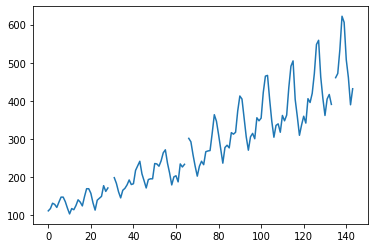

In [16]:
plt.plot(df['y'])

#### looks like missing values so lets impute the data with mean

In [18]:
mean=df['y'].mean()

### mean imputation for missing values

In [20]:
df['y'] = df['y'].fillna(mean)

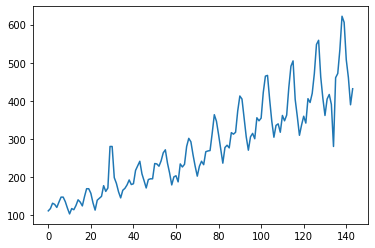

In [21]:
plt.plot(df.y)

In [22]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [24]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [25]:
#lets instanitiate the model
model = Prophet()

In [26]:
#lets fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [29]:
#create future dates for 365 days 
future_dates = model.make_future_dataframe(periods=365)

In [30]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [33]:
#lets predict on future dates
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,105.592189,56.186778,121.334752,105.592189,105.592189,-16.958578,-16.958578,-16.958578,-16.958578,-16.958578,-16.958578,0.0,0.0,0.0,88.633611
1,1949-02-01,107.780080,56.130326,118.136644,107.780080,107.780080,-21.668425,-21.668425,-21.668425,-21.668425,-21.668425,-21.668425,0.0,0.0,0.0,86.111655
2,1949-03-01,109.756240,62.414042,130.875272,109.756240,109.756240,-13.737705,-13.737705,-13.737705,-13.737705,-13.737705,-13.737705,0.0,0.0,0.0,96.018535
3,1949-04-01,111.944131,80.664894,146.268519,111.944131,111.944131,0.640397,0.640397,0.640397,0.640397,0.640397,0.640397,0.0,0.0,0.0,112.584528
4,1949-05-01,114.061444,81.065180,149.003560,114.061444,114.061444,1.580642,1.580642,1.580642,1.580642,1.580642,1.580642,0.0,0.0,0.0,115.642086


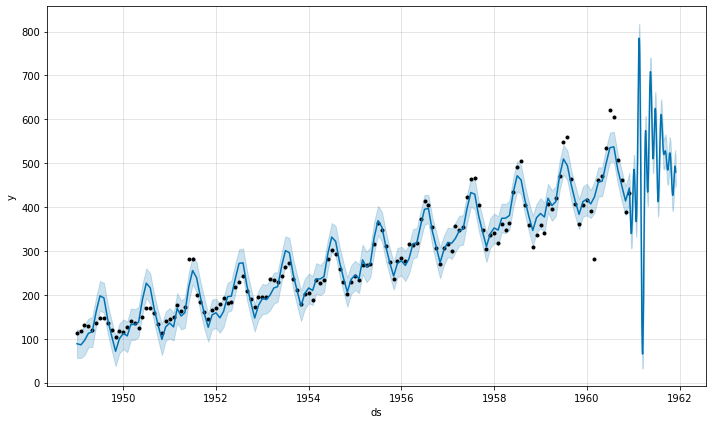

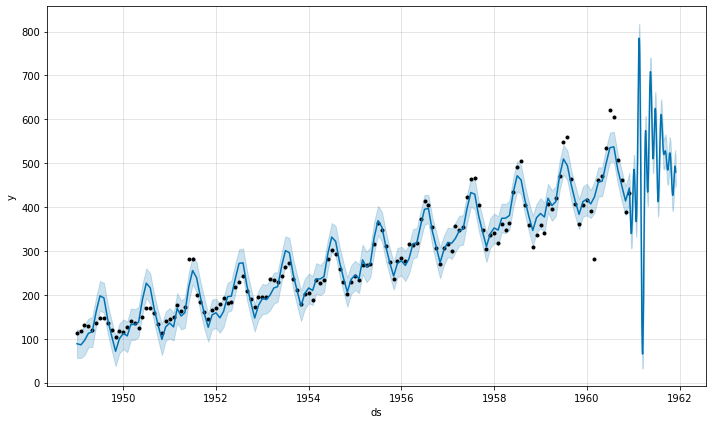

In [34]:
#let plot prediction
model.plot(prediction)

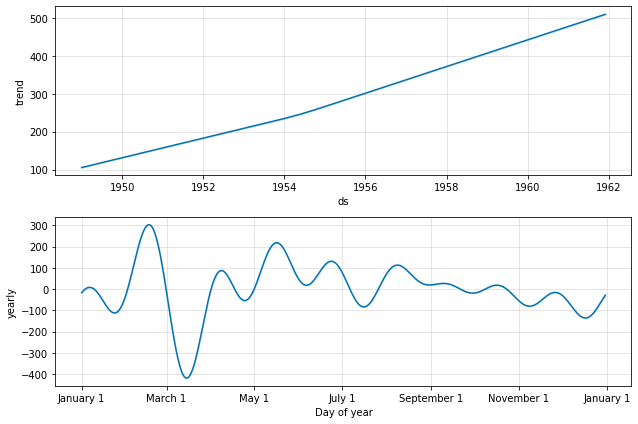

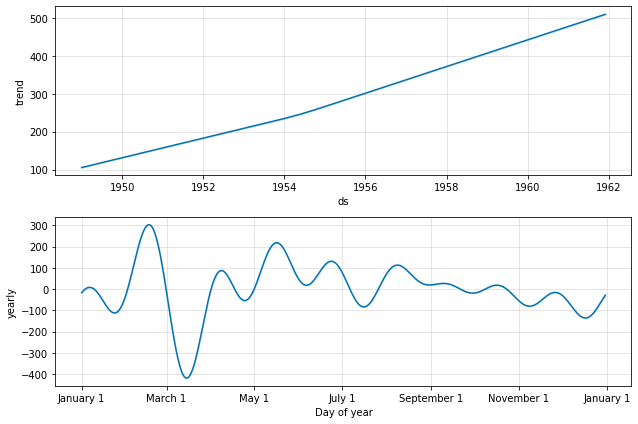

In [35]:
model.plot_components(prediction)

In [36]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='730 days',period = '180 days', horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.150324,158.776215,150.000000,1951-01-18
1,1951-03-01,171.498221,170.365461,172.535858,178.000000,1951-01-18
2,1951-04-01,159.630469,157.327925,161.848679,163.000000,1951-01-18
3,1951-05-01,144.280404,140.477310,147.780233,172.000000,1951-01-18
4,1951-06-01,178.395560,173.411401,183.234309,280.735714,1951-01-18


In [37]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,958.135885,30.953770,23.886216,0.074443,0.065873,0.454545
1,42 days,993.578604,31.521082,24.650025,0.076869,0.065873,0.409091
2,46 days,807.467361,28.415970,23.076163,0.075880,0.072654,0.363636
3,47 days,957.337795,30.940876,25.328972,0.078960,0.079325,0.363636
4,48 days,963.109892,31.034012,25.629644,0.080981,0.079325,0.363636


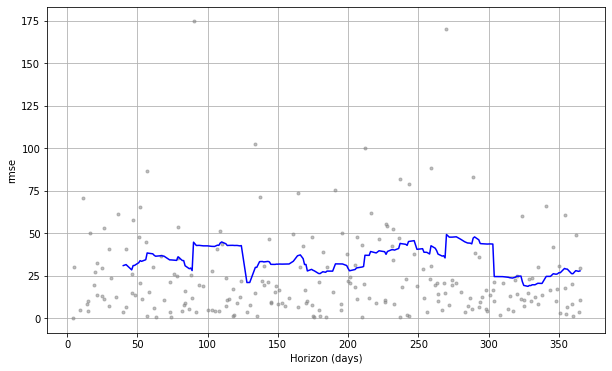

In [38]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')